<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/48_Pro_%D0%9F%D0%BE%D0%B4%D0%B1%D0%BE%D1%80_%D0%B0%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/z94UWEnCCeI

Задание Pro

Макс 10 баллов


1. Сделайте самостоятельно довольно мощную свёрточную сеть для Cifar10.

2. Добейтесь, чтобы ГА сделал точность на проверочной заметно выше, чем у вашей сети.

3. Для скорости можно использовать для обучения первые 1000 картинок и для проверки следующие 200 картинок.

Подсказка: в стартовую популяцию можно добавить вашу сеть или около 10 вариаций с небольшими отклонениями от неё, но лучше не всю популяцию делать вариациями от неё, чтобы у ГА была вариативность.



**Импорт библиотек для работы всего ноутбука**


In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential, Model #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive
import time

%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Распознавание изображений из набора данных Cifar10

*Разбор данного раздела:* https://youtu.be/c78nXd8NuK4?t=964

In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

In [ ]:
x_train10.shape

(50000, 32, 32, 3)

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

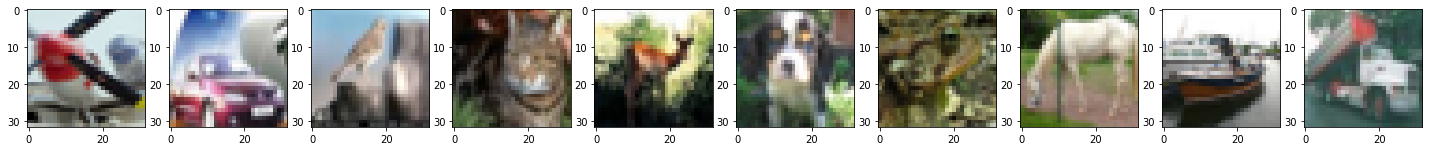

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

*Разбор данного раздела:* https://youtu.be/c78nXd8NuK4?t=1093

Epoch 1/30
391/391 [==============================] - 16s 15ms/step - loss: 1.5435 - accuracy: 0.4376 - val_loss: 1.2471 - val_accuracy: 0.5600
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 1.1118 - accuracy: 0.6012 - val_loss: 0.9831 - val_accuracy: 0.6646
Epoch 3/30
391/391 [==============================] - 5s 14ms/step - loss: 0.9387 - accuracy: 0.6687 - val_loss: 0.8951 - val_accuracy: 0.6785
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.8293 - accuracy: 0.7061 - val_loss: 0.7380 - val_accuracy: 0.7400
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.7574 - accuracy: 0.7310 - val_loss: 0.7680 - val_accuracy: 0.7315
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7039 - accuracy: 0.7522 - val_loss: 0.7102 - val_accuracy: 0.7521
Epoch 7/30
391/391 [==============================] - 5s 14ms/step - loss: 0.6611 - accuracy: 0.7674 - val_loss: 0.6941 - val_accuracy: 0.761

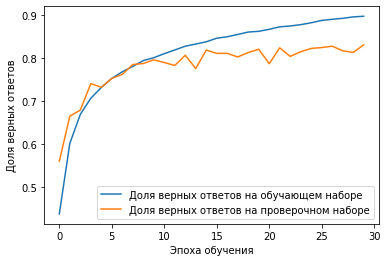

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=30,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

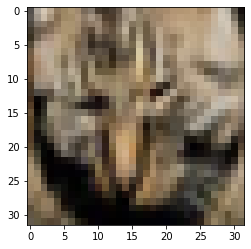

Выход сети:  [1.8835833e-04 4.9225721e-03 6.6415861e-04 7.0777404e-01 7.6971717e-02
 3.6547403e-03 1.7994511e-01 7.4339501e-04 7.7911624e-04 2.4356790e-02]
Распознанный образ:  3
Верный ответ:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Распознанный браз на картинке:  кот


In [ ]:
#Выбираем номер пример
n = np.random.randint(x_test10.shape[0])

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

In [ ]:
val = history.history["val_accuracy"][-1]

In [ ]:
print(val)

0.8299999833106995


In [ ]:
#Создаём сеть (net - список параметров)
def createConvNet(net):

  model = Sequential()             # Создаем моель Sequential
  
  makeFirstNormalization = net[0]  # Делаем ли нормализацию в начале
  firstConvSize = 2 ** net[1]      # Размер первого вёрточного слоя
  firstConvKernel = net[2]         # Ядро первого свёрточного слоя
  activation0 = net[3]             # Функция активации входного слоя
  makeMaxPooling0 = net[4]         # Делаем ли maxpooling для нулевого слоя
  maxPoolingSize0 = net[5]         # Размер MaxPooling
  makeDropout0 = net[6]             # Делаем ли Dropout
  dropoutSize0 = net[7]             # Размер Dropout

  makeSecondConv = net[8]          # Делаем ли второй свёрточный слой
  secondConvSize = 2 ** net[9]     # Размер второго свёрточного слоя
  secondConvKernel = net[10]        # Ядро второго свёрточного слоя
  makeMaxPooling1 = net[11]         # Делаем ли MaxPooling
  maxPoolingSize1 = net[12]        # Размер MaxPooling
  activation1 = net[13]            # Функция активации
  makeDropout1 = net[14]             # Делаем ли Dropout
  dropoutSize1 = net[15]             # Размер Dropout

  makeThirdConv = net[16]          # Делаем ли третий свёрточный слой
  thirdConvSize = 2 ** net[17]     # Размер третьего свёрточного слоя
  thirdConvKernel = net[18]        # Ядро третьега свёрточного слоя
  makeMaxPooling2 = net[19]        # Делаем ли MaxPooling
  maxPoolingSize2 = net[20]        # Размер MaxPooling
  activation2 = net[21]            # Функция активации
  makeDropout2 = net[22]           # Делаем ли Dropout
  dropoutSize2 = net[23]           # Размер Dropout

  makeFourthConv = net[24]         # Делаем ли четвертый свёрточный слой
  fourthConvSize = 2 ** net[25]    # Размер четвертого свёрточного слоя
  fourthConvKernel = net[26]       # Ядро четвертого свёрточного слоя
  makeMaxPooling3 = net[27]        # Делаем ли MaxPooling
  maxPoolingSize3 = net[28]        # Размер MaxPooling
  activation3 = net[29]            # Функция активации
  makeDropout3 = net[30]           # Делаем ли Dropout
  dropoutSize3 = net[31]           # Размер Dropout

  makeFifthConv = net[32]          # Делаем ли пятый свёрточный слой
  fifthConvSize = 2 ** net[33]    # Размер пятого свёрточного слоя
  fifthConvKernel = net[34]        # Ядро пятого свёрточного слоя
  makeMaxPooling4 = net[35]        # Делаем ли MaxPooling
  maxPoolingSize4 = net[36]        # Размер MaxPooling
  activation4 = net[37]            # Функция активации
  makeDropout4 = net[38]           # Делаем ли Dropout
  dropoutSize4 = net[39]           # Размер Dropout

  makeSixthConv = net[40]          # Делаем ли шестой свёрточный слой
  sixthConvSize = 2 ** net[41]     # Размер шестого свёрточного слоя
  sixthConvKernel = net[42]        # Ядро шестого свёрточного слоя
  makeMaxPooling5 = net[43]        # Делаем ли MaxPooling
  maxPoolingSize5 = net[44]        # Размер MaxPooling
  activation5 = net[45]            # Функция активации
  makeDropout5 = net[46]           # Делаем ли Dropout
  dropoutSize5 = net[47]           # Размер Dropout

  activation6 = net[48]            # Функция активации для 
  activation7 = net[49]            # Функция активации для последнего слоя

  makeSecondNormalization = net[50] # Делаем ли финальную нормализацию
  denseSize = 2 ** net[51]          # Размер полносвязного слоя

  activation_list = ['linear','relu','tanh','softmax','sigmoid'] 

  if (makeFirstNormalization):      # Если делаем нормализацию в начале

    # Добавляем слой BatchNormalization
    model.add(BatchNormalization(input_shape=(32, 32, 3))) #!

    # Добавляем Conv2D-слой с firstConvSize нейронами и ядром (firstConvKernel)
    model.add(Conv2D(firstConvSize, firstConvKernel, activation=activation_list[activation0], padding='same')) 
  else:

    # Добавляем Conv2D-слой с firstConvSize нейронами и ядром (firstConvKernel)
    model.add(Conv2D(firstConvSize, firstConvKernel, input_shape=(32, 32, 3), activation=activation_list[activation0], padding='same')) 

  if makeMaxPooling0:               # Если делаем maxpooling
    model.add(MaxPooling2D((maxPoolingSize0, maxPoolingSize0)))
  if makeDropout0:               # Если делаем Dropout
    model.add(Dropout(dropoutSize0))


  if (makeSecondConv):              # Если делаем второй свёрточный слой
    # Добавляем Conv2D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(secondConvSize, secondConvKernel, activation=activation_list[activation1], padding='same')) 
    
    if (makeMaxPooling1):           # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize)
      model.add(MaxPooling2D((maxPoolingSize1, maxPoolingSize1))) 
    if makeDropout1:               # Если делаем Dropout
      model.add(Dropout(dropoutSize1))

  if (makeThirdConv):               # Если делаем второй свёрточный слой
    # Добавляем Conv2D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(thirdConvSize, thirdConvKernel, activation=activation_list[activation2], padding='same')) 

    if (makeMaxPooling2):           # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
      model.add(MaxPooling2D((maxPoolingSize2, maxPoolingSize2))) 
    if makeDropout2:               # Если делаем Dropout
      model.add(Dropout(dropoutSize2))

  if (makeFourthConv):               # Если делаем второй свёрточный слой
    # Добавляем Conv2D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(fourthConvSize, fourthConvKernel, activation=activation_list[activation3], padding='same')) 

    if (makeMaxPooling3):           # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
      model.add(MaxPooling2D((maxPoolingSize3, maxPoolingSize3))) 
    if makeDropout3:               # Если делаем Dropout
      model.add(Dropout(dropoutSize3))

  if (makeFifthConv):               # Если делаем второй свёрточный слой
    # Добавляем Conv2D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(fifthConvSize, fifthConvKernel, activation=activation_list[activation4], padding='same')) 

    if (makeMaxPooling4):           # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
      model.add(MaxPooling2D((maxPoolingSize4, maxPoolingSize4))) 
    if makeDropout4:               # Если делаем Dropout
      model.add(Dropout(dropoutSize4))

  if (makeSixthConv):               # Если делаем второй свёрточный слой
    # Добавляем Conv2D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(fifthConvSize, fifthConvKernel, activation=activation_list[activation4], padding='same')) 

    if (makeMaxPooling5):           # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
      model.add(MaxPooling2D((maxPoolingSize5, maxPoolingSize5))) 
    if makeDropout5:               # Если делаем Dropout
      model.add(Dropout(dropoutSize5))
          
  if (makeSecondNormalization):     # Если делаем финальную нормализацию
    model.add(BatchNormalization()) # Добавляем слой BatchNormalization
  
  model.add(Flatten())              # Добавляем слой Flatten

  model.add(Dense(denseSize, activation=activation_list[activation6])) # Добавляем слой Dense с denseSize нейронами
  model.add(Dense(10, activation=activation_list[activation7]))         # Добавляем Dense-слой с softmax-активацией и 10 нейронами
  
  return model                      # Возвращаем модель

'''
  Функция вычисления результата работы сети
'''

def evaluateNet(net, ep, verb):
  val = 0
  time.time()
  model = createConvNet(net) # Создаем модель createConvNet

  # Компилируем модель
  model.compile(optimizer=Adam(learning_rate=1e-4),                  
                loss="categorical_crossentropy",
                metrics=["accuracy"])

  history = model.fit(x_train10, y_train10,
                      batch_size = 128,
                      epochs=5, 
                      verbose=verb,
                      validation_data=(x_test10, y_test10))

  # val = history.history["val_loss"][-1] # Возвращаем точность на проверочной выборке с последней эпохи
  val = history.history["val_accuracy"][-1] #!
  
  return val, model                      # Возвращаем точность

'''
  Функция создания списка случайных параметров
'''
def createRandomNet():
  net = []
  net.append(random.randint(0,1)) #Делаем или нет нормализацию
  net.append(random.randint(3,6)) #Первый свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) #Ядро первого свёрточного слоя от 3 до 7
  net.append(random.randint(0,4)) # Функция активации первого слоя
  net.append(random.randint(0,1)) #Делаем ли MaxPooling
  net.append(random.randint(2,2)) #Размер MaxPooling
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0.2)  # Размер Dropout

  net.append(random.randint(0,1)) # Сколько делаем еще сверточных слоев
  net.append(random.randint(3,6)) # Второй свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) # Ядро второго свёрточного слоя от 3 до 7
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,2)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации второго слоя
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0.2)  # Размер Dropout

  net.append(random.randint(0,1)) # Сколько делаем еще сверточных слоев
  net.append(random.randint(3,6)) # Третий свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) # Ядро третьего свёрточного слоя от 3 до 7
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,2)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации третьего слоя
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0.2)  # Размер Dropout

  net.append(random.randint(0,1)) # Сколько делаем еще сверточных слоев
  net.append(random.randint(3,6)) # Четвертый свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) # Ядро четвертого свёрточного слоя от 3 до 7
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,2)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации четвертого слоя
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0.2)  # Размер Dropout

  net.append(random.randint(0,1)) # Сколько делаем еще сверточных слоев
  net.append(random.randint(3,6)) # Пятый свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) # Ядро пятого свёрточного слоя от 3 до 7
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,2)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации пятого слоя
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0.2)  # Размер Dropout

  net.append(random.randint(0,1)) # Сколько делаем еще сверточных слоев
  net.append(random.randint(3,6)) # Шестой свёрточный слой от 8 до 64 нейронов
  net.append(random.randint(5,6)) # Ядро шестого свёрточного слоя от 3 до 7
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,2)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации шестого слоя
  net.append(random.randint(0,1)) # Делаем ли Dropout
  net.append(0)  # Размер Dropout

  net.append(random.randint(0,4)) # Функция активации предпоследнего dense слоя
  net.append(random.randint(3,3)) # Функция активации последнего слоя "softmax" #!

  net.append(random.randint(0,1)) # Делаем ли финальную нормализацию слой
  net.append(random.randint(3,6)) # Размер полносвязного слоя от 8 до 64
  
  return net 

In [ ]:
n = 20              # Общее число ботов
nsurv = 10          # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv    # Количество новых (столько новых ботов создается)
l = 52              # Размер бота 
epohs = 10          # количество эпох

mut = 0.09          # коэфициент мутаций

popul = []          # Массив популяции
val = []            # Одномерный массив значений этих ботов

#Создаём случайных ботов
for i in range(n):
  popul.append(createRandomNet())
  
for it in range(epohs):                 # Пробегаем по всем эпохам
  val = []                              # Обнуляем значения бота
  curr_time = time.time()
  for i in range(n):                    # Пробегаем в цикле по всем ботам 
    bot = popul[i]                      # Берем очередного бота
    f, model_sum = evaluateNet(bot, 3, 0) # Вычисляем точность текущего бота
    val.append(f)                       # Добавляем полученное значение в список val
  
  # sval = sorted(val, reverse=0)         # Сортируем val
  sval = sorted(val, reverse=1) #!
  # Выводим 5 лучших ботов
  print(it, time.time() - curr_time, " ", sval[0:5],popul[:5]) 
  
  newpopul = []                         # Создаем пустой список под новую популяцию
  for i in range(nsurv):                # Пробегаем по всем выжившим ботам
    index = val.index(sval[i])          # Получаем индекс очередного бота из списка лучших в списке val
    newpopul.append(popul[index])       # Добавляем в новую популяцию бота из popul с индексом index
    
  for i in range(nnew):                 # Проходимся в цикле nnew-раз  
    indexp1 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    botp1 = newpopul[indexp1]           # Получаем первого бота-родителя по indexp1
    botp2 = newpopul[indexp2]           # Получаем второго бота-родителя по indexp2    
    newbot = []                         # Создаем пустой список под значения нового бота    
    net4Mut = createRandomNet()         # Создаем случайную сеть для мутаций
    for j in range(l):                  # Пробегаем по всей длине бота    
      x = 0      
      pindex = random.random()          # Получаем случайное число в диапазоне от 0 до 1

      # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
      if pindex < 0.5:
        x = botp1[j]
      else:
        x = botp2[j]
      
      # С вероятностью mut устанавливаем значение бота из net4Mut
      if (random.random() < mut):
        x = net4Mut[j]
        
      newbot.append(x)                  # Добавляем очередное значение в нового бота      
    newpopul.append(newbot)             # Добавляем бота в новую популяцию      
  popul = newpopul                      # Записываем в popul новую посчитанную популяцию

0 569.7766616344452   [0.5457000136375427, 0.5383999943733215, 0.5230000019073486, 0.5210000276565552, 0.5194000005722046] [[0, 3, 5, 3, 0, 2, 0, 0.2, 1, 6, 5, 1, 2, 3, 1, 0.2, 0, 3, 6, 0, 2, 3, 0, 0.2, 0, 5, 5, 1, 2, 4, 0, 0.2, 1, 3, 6, 1, 2, 1, 0, 0.2, 0, 3, 5, 1, 2, 4, 0, 0, 1, 3, 1, 6], [1, 5, 6, 3, 1, 2, 0, 0.2, 0, 3, 6, 1, 2, 2, 0, 0.2, 1, 6, 5, 0, 2, 3, 1, 0.2, 1, 5, 5, 1, 2, 1, 1, 0.2, 1, 6, 5, 1, 2, 4, 0, 0.2, 0, 3, 5, 1, 2, 0, 1, 0, 1, 3, 1, 6], [1, 4, 5, 0, 1, 2, 1, 0.2, 1, 5, 5, 0, 2, 2, 0, 0.2, 1, 6, 5, 1, 2, 3, 1, 0.2, 0, 4, 5, 0, 2, 3, 1, 0.2, 1, 5, 6, 0, 2, 1, 1, 0.2, 0, 3, 6, 1, 2, 2, 1, 0, 4, 3, 1, 4], [1, 4, 6, 0, 0, 2, 0, 0.2, 0, 5, 6, 0, 2, 0, 0, 0.2, 1, 6, 5, 0, 2, 0, 1, 0.2, 0, 3, 5, 1, 2, 0, 1, 0.2, 1, 5, 5, 1, 2, 3, 0, 0.2, 1, 3, 5, 0, 2, 3, 1, 0, 0, 3, 0, 4], [0, 3, 5, 1, 0, 2, 1, 0.2, 0, 5, 5, 1, 2, 2, 1, 0.2, 1, 5, 6, 1, 2, 0, 0, 0.2, 0, 4, 5, 0, 2, 0, 1, 0.2, 0, 6, 5, 1, 2, 4, 0, 0.2, 1, 6, 6, 1, 2, 4, 1, 0, 2, 3, 1, 3]]
1 612.3514785766602   [0.54619997739

In [ ]:
print(popul) #Геномы лучших ботов по эпохам

[[1, 4, 5, 2, 0, 2, 0, 0.2, 1, 6, 6, 1, 2, 1, 0, 0.2, 1, 6, 6, 0, 2, 1, 0, 0.2, 0, 3, 6, 0, 2, 1, 0, 0.2, 0, 3, 5, 0, 2, 0, 0, 0.2, 0, 5, 6, 0, 2, 3, 1, 0, 0, 3, 0, 6], [1, 4, 5, 2, 0, 2, 0, 0.2, 1, 6, 5, 1, 2, 1, 0, 0.2, 1, 6, 5, 0, 2, 2, 1, 0.2, 0, 3, 6, 0, 2, 1, 0, 0.2, 0, 6, 5, 1, 2, 3, 0, 0.2, 1, 5, 6, 0, 2, 1, 1, 0, 0, 3, 1, 6], [1, 4, 5, 0, 0, 2, 0, 0.2, 1, 6, 5, 1, 2, 1, 1, 0.2, 1, 6, 5, 0, 2, 1, 1, 0.2, 0, 3, 6, 0, 2, 1, 0, 0.2, 0, 5, 5, 0, 2, 3, 0, 0.2, 0, 5, 6, 0, 2, 1, 1, 0, 0, 3, 1, 6], [1, 4, 5, 2, 0, 2, 1, 0.2, 1, 6, 6, 1, 2, 1, 0, 0.2, 1, 6, 6, 0, 2, 1, 1, 0.2, 0, 3, 5, 0, 2, 2, 0, 0.2, 0, 5, 5, 0, 2, 0, 0, 0.2, 0, 5, 6, 0, 2, 2, 1, 0, 0, 3, 0, 6], [1, 4, 5, 2, 0, 2, 1, 0.2, 1, 6, 6, 1, 2, 1, 0, 0.2, 1, 6, 6, 0, 2, 0, 1, 0.2, 0, 3, 6, 0, 2, 1, 0, 0.2, 0, 6, 5, 1, 2, 1, 0, 0.2, 1, 5, 6, 0, 2, 2, 1, 0, 0, 3, 1, 6], [1, 4, 5, 2, 0, 2, 1, 0.2, 1, 6, 6, 1, 2, 1, 0, 0.2, 1, 6, 6, 0, 2, 1, 1, 0.2, 0, 3, 6, 0, 2, 1, 0, 0.2, 0, 5, 5, 1, 2, 0, 0, 0.2, 0, 5, 6, 0, 2, 2, 1, 0, 2, 3

In [ ]:
model = createConvNet(popul[0])
model.summary()


Model: "sequential_226"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_304 (Ba  (None, 32, 32, 3)        12        
 tchNormalization)                                               
                                                                 
 conv2d_863 (Conv2D)         (None, 32, 32, 16)        1216      
                                                                 
 conv2d_864 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_319 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_865 (Conv2D)         (None, 16, 16, 64)        147520    
                                                                 
 flatten_222 (Flatten)       (None, 16384)          

In [ ]:
#задаём batch_size
batch_size = 128 

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-3), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=50,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

Epoch 1/50
391/391 [==============================] - 9s 22ms/step - loss: 1.5270 - accuracy: 0.4532 - val_loss: 1.2640 - val_accuracy: 0.5482
Epoch 2/50
391/391 [==============================] - 8s 22ms/step - loss: 1.1481 - accuracy: 0.5971 - val_loss: 1.1149 - val_accuracy: 0.6174
Epoch 3/50
391/391 [==============================] - 8s 21ms/step - loss: 1.0227 - accuracy: 0.6431 - val_loss: 1.0164 - val_accuracy: 0.6481
Epoch 4/50
391/391 [==============================] - 8s 21ms/step - loss: 0.9371 - accuracy: 0.6730 - val_loss: 0.9686 - val_accuracy: 0.6629
Epoch 5/50
391/391 [==============================] - 8s 21ms/step - loss: 0.8554 - accuracy: 0.7040 - val_loss: 0.9410 - val_accuracy: 0.6751
Epoch 6/50
391/391 [==============================] - 8s 21ms/step - loss: 0.7798 - accuracy: 0.7300 - val_loss: 0.9379 - val_accuracy: 0.6809
Epoch 7/50
391/391 [==============================] - 8s 21ms/step - loss: 0.6954 - accuracy: 0.7580 - val_loss: 0.9374 - val_accuracy: 0.6906

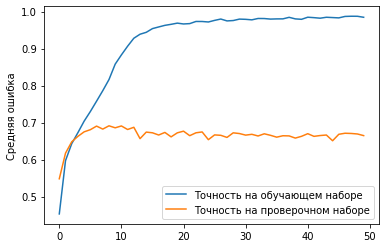

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Точность на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# Уменьшим до lr 10-4
#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=50,
                    validation_data=(x_test10, y_test10),
                    verbose=1)


Epoch 1/50
391/391 [==============================] - 9s 22ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 3.6119 - val_accuracy: 0.6689
Epoch 2/50
391/391 [==============================] - 8s 22ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 3.5863 - val_accuracy: 0.6711
Epoch 3/50
391/391 [==============================] - 8s 22ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 3.5746 - val_accuracy: 0.6728
Epoch 4/50
391/391 [==============================] - 8s 21ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 3.5674 - val_accuracy: 0.6747
Epoch 5/50
391/391 [==============================] - 8s 21ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 3.5596 - val_accuracy: 0.6754
Epoch 6/50
391/391 [==============================] - 8s 21ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 3.5568 - val_accuracy: 0.6756
Epoch 7/50
391/391 [==============================] - 8s 21ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 3.5618 - val_accuracy: 0.6762

In [ ]:
# Уменьшим до lr 10-5
#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=50,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

Epoch 1/50
391/391 [==============================] - 9s 22ms/step - loss: 1.6295e-05 - accuracy: 1.0000 - val_loss: 4.3350 - val_accuracy: 0.6873
Epoch 2/50
391/391 [==============================] - 8s 22ms/step - loss: 1.3128e-05 - accuracy: 1.0000 - val_loss: 4.3612 - val_accuracy: 0.6866
Epoch 3/50
391/391 [==============================] - 8s 22ms/step - loss: 1.1820e-05 - accuracy: 1.0000 - val_loss: 4.3979 - val_accuracy: 0.6871
Epoch 4/50
391/391 [==============================] - 8s 21ms/step - loss: 1.0050e-05 - accuracy: 1.0000 - val_loss: 4.4211 - val_accuracy: 0.6874
Epoch 5/50
391/391 [==============================] - 8s 21ms/step - loss: 9.1621e-06 - accuracy: 1.0000 - val_loss: 4.4462 - val_accuracy: 0.6874
Epoch 6/50
391/391 [==============================] - 8s 21ms/step - loss: 8.3168e-06 - accuracy: 1.0000 - val_loss: 4.4713 - val_accuracy: 0.6870
Epoch 7/50
391/391 [==============================] - 8s 21ms/step - loss: 7.5746e-06 - accuracy: 1.0000 - val_loss: 4